### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [189]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [190]:
raw_df = pd.read_csv('marketing_campaign.csv', sep='\t')

raw_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [191]:
print('Кількість рядків і колонок:', df.shape)
print('\nТипи даних колонок:')
print(df.dtypes)
print('\nКількість пропущених значень у кожній колонці:')
print(df.isnull().sum())

Кількість рядків і колонок: (2240, 37)

Типи даних колонок:
ID                                                 int64
Year_Birth                                         int64
Education                                        float64
Income                                           float64
Kidhome                                            int64
Teenhome                                           int64
Dt_Customer                               datetime64[ns]
Recency                                            int64
MntWines                                           int64
MntFruits                                          int64
MntMeatProducts                                    int64
MntFishProducts                                    int64
MntSweetProducts                                   int64
MntGoldProds                                       int64
NumDealsPurchases                                  int64
NumWebPurchases                                    int64
NumCatalogPurchases         

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

В даних є пропущені значення в колонці `Income`. Заповнювати будемо медіаною так як вона стійка до викидів в даних.

In [192]:
raw_df['Income'] = raw_df['Income'].fillna(df['Income'].median())

print('Кількість пропущених значень у колонці Income:', df['Income'].isnull().sum())

Кількість пропущених значень у колонці Income: 0


**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [193]:
# Виводимо категоріальні колонки
cat_cols = raw_df.select_dtypes(include=['object']).columns.drop('Dt_Customer')
print('Категоріальні колонки:', cat_cols)

# Виводимо значення категоріальних колонок
for col in cat_cols:
    print(f'\n{col}:')
    print(raw_df[col].unique())

raw_df['Dt_Customer'] = pd.to_datetime(raw_df['Dt_Customer'], format='%d-%m-%Y')

Категоріальні колонки: Index(['Education', 'Marital_Status'], dtype='object')

Education:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Marital_Status:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


`Education` ми можемо обробити за допомогою OrdinalEncoder, а `Marital_Status` - за допомогою OneHotEncoder.

`Dt_Customer` можна перетворити на кількість днів з моменту реєстрації клієнта до сьогоднішнього дня.

In [194]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from datetime import datetime

df = raw_df.copy()

# Обробка категоріальних колонок
ordinal_encoder = OrdinalEncoder()
df['Education'] = ordinal_encoder.fit_transform(df[['Education']])

onehot_encoder = OneHotEncoder(sparse_output=False)
marital_status_encoded = onehot_encoder.fit_transform(df[['Marital_Status']])

# Обробка дати
df['Dt_Customer_Since_Registration_In_Days'] = (datetime.now() - df['Dt_Customer']).dt.days
# Об'єднуємо оброблені дані
df = pd.concat([df, pd.DataFrame(marital_status_encoded, columns=onehot_encoder.get_feature_names_out(['Marital_Status']))], axis=1)

# Видаляємо старі колонки
df.drop(columns=['Marital_Status'], inplace=True)

In [195]:
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Response,Dt_Customer_Since_Registration_In_Days,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,2.0,58138.0,0,0,2012-09-04,58,635,88,...,1,4627,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,1954,2.0,46344.0,1,1,2014-03-08,38,11,1,...,0,4077,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,1965,2.0,71613.0,0,0,2013-08-21,26,426,49,...,0,4276,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,2.0,26646.0,1,0,2014-02-10,26,11,4,...,0,4103,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,4.0,58293.0,1,0,2014-01-19,94,173,43,...,0,4125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [196]:
X = raw_df.select_dtypes(include=[np.number]).drop('ID', axis=1)
X

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,4,0,0,0,0,0,0,3,11,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,6,0,0,0,0,0,0,3,11,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,5,0,0,0,0,0,0,3,11,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,7,0,0,0,1,0,0,3,11,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,6,0,1,0,0,0,0,3,11,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,3,0,0,0,0,0,0,3,11,0


In [197]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[0 0 1 ... 0 1 0]


In [198]:
raw_df['cluster_k3'] = labels
print(raw_df['cluster_k3'].value_counts())

cluster_k3
0    852
2    781
1    607
Name: count, dtype: int64


In [199]:
centroids = kmeans.cluster_centers_
s = silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.54


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [200]:
fig = px.scatter_3d(
    raw_df,
    x='Income',
    y='NumWebPurchases',
    z='MntWines',
    color='cluster_k3',
    title='Кластери за Income, WebPurchases і MntWines',
    labels={'cluster_k3':'Кластер'}
)
fig.update_layout(legend_title_text='Кластер')
fig.show()

In [201]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X)
raw_df['PC1'], raw_df['PC2'] = pcs[:,0], pcs[:,1]

fig2 = px.scatter(
    raw_df,
    x='PC1', y='PC2',
    color='cluster_k3',
    title='PCA‑проекція кластерів',
    labels={'cluster_k3':'Кластер'}
)
fig2.show()

Попередньо бачимо, що в цілому добре поділені клієнти. Можна побачити, що наче є як викиди, але це також може бути 4й кластер насправді там VIP клієнтів, або так само це можуть бути викиди.

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [202]:
X = df.select_dtypes(include=[np.number]).drop('ID', axis=1)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[0 0 1 ... 0 1 0]


In [203]:
df['cluster_k3_df'] = labels
print(df['cluster_k3_df'].value_counts())

cluster_k3_df
0    852
2    781
1    607
Name: count, dtype: int64


In [204]:
centroids = kmeans.cluster_centers_
s = silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.54


In [205]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X)
df['PC1'], df['PC2'] = pcs[:,0], pcs[:,1]

fig2 = px.scatter(
    df,
    x='PC1', y='PC2',
    color='cluster_k3_df',
    title='PCA‑проекція кластерів',
    labels={'cluster_k3_df':'Кластер'}
)
fig2.show()

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [206]:
def remove_outlines(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

outlier_columns = ['Income', 'NumWebPurchases', 'MntWines']
df = remove_outlines(df, outlier_columns)
print('Кількість рядків до видалення викидів:', raw_df.shape[0])
print('Кількість рядків після видалення викидів:', df.shape[0])

Кількість рядків до видалення викидів: 2240
Кількість рядків після видалення викидів: 2193


In [208]:
from sklearn.decomposition import PCA


X = df.select_dtypes(include=[np.number]).drop('ID', axis=1)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

df['cluster_k3_df'] = labels
print(df['cluster_k3_df'].value_counts())

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X)
df['PC1'], df['PC2'] = pcs[:,0], pcs[:,1]

fig2 = px.scatter(
    df,
    x='PC1', y='PC2',
    color='cluster_k3_df',
    title='PCA‑проекція кластерів',
    labels={'cluster_k3_df':'Кластер'}
)
fig2.show()

[0 0 2 ... 0 2 0]
cluster_k3_df
0    782
1    729
2    682
Name: count, dtype: int64


**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

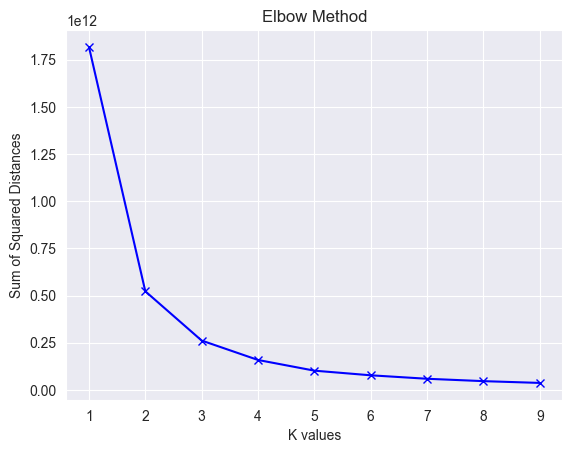

In [209]:
import matplotlib.pyplot as plt

K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [214]:
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters=4, random_state=42)

X_scaled = StandardScaler().fit_transform(X)
clusters_scaled = kmeans.fit_predict(X_scaled)

silhouette_opt = silhouette_score(X_scaled, clusters_scaled)

print(f'Silhouette Coefficient for the data Dataset Clusters: {silhouette_opt:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.12


In [217]:
df_viz = df.copy()
df_viz['Cluster'] = clusters_scaled

fig = px.scatter_3d(df_viz,
                    x='Income',
                    y='NumWebPurchases',
                    z='MntWines',
                    color='Cluster',
                    title=f'3D Візуалізація кластерів для k=4')
fig.show()

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

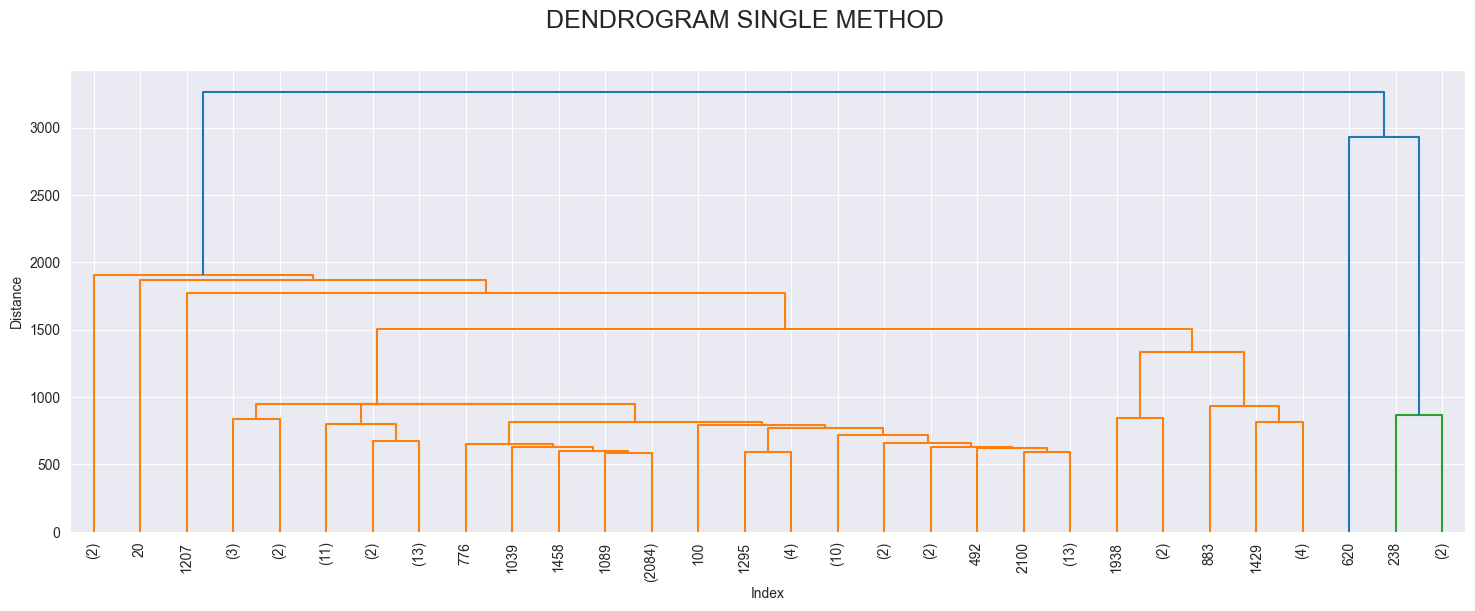

In [222]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


raw_df = pd.read_csv('marketing_campaign.csv', sep='\t')
df = raw_df.copy()
df = raw_df.select_dtypes(include=[np.number]).drop('ID', axis=1)

outlier_columns = ['Income', 'NumWebPurchases', 'MntWines']
X = remove_outlines(df, outlier_columns)

dist_sin = linkage(X, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, truncate_mode='lastp', leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [228]:
clusters_2 = fcluster(dist_sin, t=2, criterion='maxclust')
clusters_3 = fcluster(dist_sin, t=3, criterion='maxclust')

X['cluster_2'] = clusters_2
X['cluster_3'] = clusters_3
fig_2 = px.scatter_3d(X,
                    x='Income',
                    y='NumWebPurchases',
                    z='MntWines',
                    color='cluster_2',
                    title=f'3D Візуалізація кластерів для k=2')
fig_2.show()

fig_3 = px.scatter_3d(X,
                    x='Income',
                    y='NumWebPurchases',
                    z='MntWines',
                    color='cluster_3',
                    title=f'3D Візуалізація кластерів для k=3')
fig_3.show()

s_2 = silhouette_score(X, clusters_2)
s_3 = silhouette_score(X, clusters_3)
print(f'Silhouette Coefficient for the data Dataset Clusters: {s_2:.2f}')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s_3:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.46
Silhouette Coefficient for the data Dataset Clusters: 0.45


NOTE: Роблю вночі вже цю домашку, тому не ефективний, але те, що тут бачу, то це те, що це невдалі візуалізації.

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте метрику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [237]:
from sklearn.cluster import AgglomerativeClustering

X = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg_clustering.fit_predict(X_scaled)

silhouette = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette}")

df_viz = df.copy()
df_viz['Cluster'] = labels

fig = px.scatter_3d(df_viz,
                    x='Income',
                    y='NumWebPurchases',
                    z='MntWines',
                    color='Cluster',
                    opacity=0.7,
                    title='Agglomerative Clustering with Ward Linkage (3 clusters)')
fig.show()

Silhouette Score for Agglomerative Clustering: 0.11587244910324722
